## Import Data Sets

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
train = pd.read_csv("train.csv")
holdout = pd.read_csv("test.csv")
holdout.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Loading functions.py

In [73]:
# %load functions.py
def process_missing(df):
    """Handle various missing values from the data set

    Usage
    ------

    holdout = process_missing(holdout)
    """
    df["Fare"] = df["Fare"].fillna(train["Fare"].mean())
    df["Embarked"] = df["Embarked"].fillna("S")
    return df

def process_age(df):
    """Process the Age column into pre-defined 'bins' 

    Usage
    ------

    train = process_age(train)
    """
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def process_fare(df):
    """Process the Fare column into pre-defined 'bins' 

    Usage
    ------

    train = process_fare(train)
    """
    cut_points = [-1,12,50,100,1000]
    label_names = ["0-12","12-50","50-100","100+"]
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

def process_cabin(df):
    """Process the Cabin column into pre-defined 'bins' 

    Usage
    ------

    train process_cabin(train)
    """
    df["Cabin_type"] = df["Cabin"].str[0]
    df["Cabin_type"] = df["Cabin_type"].fillna("Unknown")
    df = df.drop('Cabin',axis=1)
    return df

def process_titles(df):
    """Extract and categorize the title from the name column 

    Usage
    ------

    train = process_titles(train)
    """
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title"] = extracted_titles.map(titles)
    return df

def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column

    Usage
    ------

    train = create_dummies(train,"Age")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [74]:
def df_process(df):
    df = process_missing(df)
    df = process_age(df)
    df = process_fare(df)
    df = process_titles(df)
    df = process_cabin(df)
    columns =["Age_categories", "Fare_categories", "Title", "Cabin_types", "Sex"]
    for col in columns:
        df = create_dummies(df, col)
        return df
    
train = df_process(train)
holdout = df_process(holdout)

In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
PassengerId                   891 non-null int64
Survived                      891 non-null int64
Pclass                        891 non-null int64
Name                          891 non-null object
Sex                           891 non-null object
Age                           891 non-null float64
SibSp                         891 non-null int64
Parch                         891 non-null int64
Ticket                        891 non-null object
Fare                          891 non-null float64
Embarked                      891 non-null object
Age_categories                891 non-null category
Fare_categories               891 non-null category
Title                         891 non-null object
Cabin_type                    891 non-null object
Age_categories_Adult          891 non-null uint8
Age_categories_Child          891 non-null uint8
Age_categories_Infant         891 non-null uin

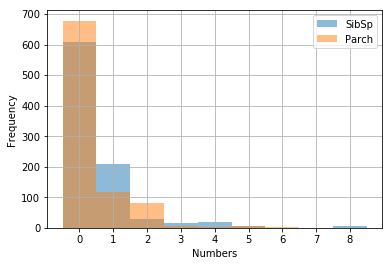

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_hist(df, col):
    df[col].plot.hist(alpha=0.5, bins=9, range=(-0.5, 8.5), xticks=np.arange(0,9,1), histtype="stepfilled")
    plt.grid(True)
    plt.xlabel('Numbers')
    plt.show()
cols = ["SibSp", "Parch"]
train_eda = train[cols].copy()
#for col in cols:
#    plot_hist(train, col)
plot_hist(train, cols)

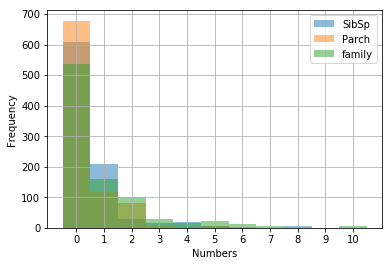

In [77]:
train_eda["family"] = train_eda[cols].sum(axis=1)
train_eda.head(5)
train_eda.plot.hist(alpha=0.5, bins=11,range=(-0.5, 10.5), xticks=np.arange(0,11,1), histtype="stepfilled")
plt.grid(True)
plt.xlabel('Numbers')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
SibSp       891 non-null int64
Parch       891 non-null int64
family      891 non-null int64
Survived    891 non-null int64
dtypes: int64(4)
memory usage: 27.9 KB


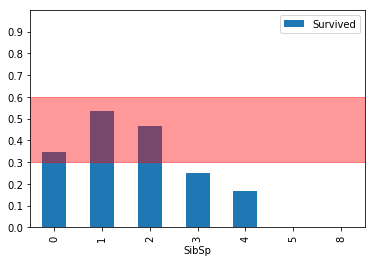

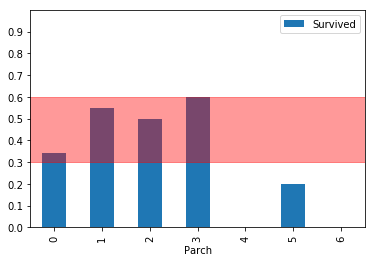

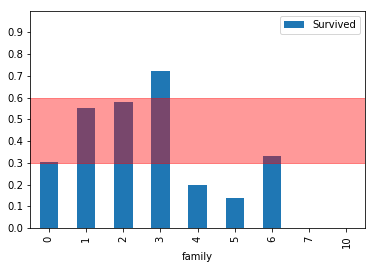

In [78]:
import numpy as np
train_eda["Survived"] = train["Survived"].copy()
train_eda.info()
for col in train_eda.columns.drop("Survived"):
    pivot = train_eda.pivot_table(index=col, values="Survived")
    pivot.plot.bar(ylim=(0,1), yticks=np.arange(0,1.0,0.1))
    plt.axhspan(.3, .6, alpha=0.4, color='red')
    plt.show()

The `SibSp` column shows the number of siblings and/or spouses each passenger had on board, while the `Parch` columns shows the number of parents or children each passenger had onboard. Neither column has any missing values.

The distribution of values in both columns is skewed right, with the majority of values being zero.

You can sum these two columns to explore the total number of family members each passenger had onboard.  The shape of the distribution of values in this case is similar, however there are less values at zero, and the quantity tapers off less rapidly as the values increase.

Looking at the survival rates of the the combined family members, you can see that few of the over 500 passengers without family members survived, while more passengers with family members survived.

# Feature Engineering

In [79]:
def process_isalone(df):
    df["family"] = df[["SibSp","Parch"]].sum(axis=1)
    df["isalone"] = 0
    df.loc[df["family"] == 0, "isalone"] = 1
    df = df.drop("family", axis=1)
    return df
train = process_isalone(train)
holdout = process_isalone(holdout)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title,Cabin_type,Age_categories_Adult,Age_categories_Child,Age_categories_Infant,Age_categories_Missing,Age_categories_Senior,Age_categories_Teenager,Age_categories_Young Adult,isalone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,Mr,Unknown,0,0,0,0,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,Mrs,C,1,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,Miss,Unknown,0,0,0,0,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,Mrs,C,0,0,0,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,Mr,Unknown,0,0,0,0,0,0,1,1


In [80]:
features = train.columns.drop(["PassengerId", "Survived"])
print(features)

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked', 'Age_categories', 'Fare_categories', 'Title', 'Cabin_type',
       'Age_categories_Adult', 'Age_categories_Child', 'Age_categories_Infant',
       'Age_categories_Missing', 'Age_categories_Senior',
       'Age_categories_Teenager', 'Age_categories_Young Adult', 'isalone'],
      dtype='object')


# Select Best Features based on RFECV

In [82]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

def select_features(df):
    df = df.select_dtypes(include=[np.number]).dropna(axis=1)
    features = df.columns.drop(["PassengerId", "Survived"])
    all_X = df[features]
    all_y = df["Survived"]
    rf = RandomForestClassifier(random_state=1)
    selector = RFECV(rf, cv=10)
    selector.fit(all_X, all_y)
    #RFECV.support_ access a boolean mask of True and False values 
    optimized_columns = list(all_X.columns[selector.support_])
    return optimized_columns

best_features = select_features(train)
print("Best Features \n"+"-"*12+"\n{}\n".format(best_features))

Best Features 
------------
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Age_categories_Adult', 'Age_categories_Child', 'Age_categories_Infant', 'Age_categories_Missing', 'Age_categories_Senior', 'Age_categories_Teenager', 'Age_categories_Young Adult', 'isalone']



# Select Best Models and Tuning Model Parameters

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
def select_models(df, features):
    all_X = df[features]
    all_y = df["Survived"]
    
    models=[
        {
            "name": "LogisticRegression",
            "estimator": LogisticRegression(),
            "hyperparameters": 
            {
                "solver": ["newton-cg", "lbfgs", "liblinear"]
            }
        },
        {
            "name": "KNeighborsClassifier",
            "estimator": KNeighborsClassifier(),
            "hyperparameters":
            {
                "n_neighbors": range(1, 20, 2),
                "weights": ["distance", "uniform"],
                "algorithm": ["ball_tree", "kd_tree", "brute"],
                "p":[1,2]
            }
        },
        {
            "name": "RandomForestClassifier",
            "estimator": RandomForestClassifier(random_state=1),
            "hyperparameters":
            {
                "n_estimators": [4,6,9],
                "criterion":["entropy", "gini"],
                "max_depth": [2, 5, 10],
                "max_features": ["log2", "sqrt"],
                "min_samples_leaf": [1, 5, 8],
                "min_samples_split": [2, 3, 5]               
            }
        }
    ]
    for model in models:
        print(model["name"])
        print('-'*len(model['name']))
        grid = GridSearchCV(model["estimator"], param_grid=model["hyperparameters"], cv=10)
        grid.fit(all_X, all_y)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_estimator"] = grid.best_estimator_
        print("Best scores: {}".format(model["best_score"]))
        print("Best parameters: {}\n".format(model["best_params"]))

    return models

optimized_models = select_models(train, best_features) 

LogisticRegression
------------------
Best scores: 0.7295173961840629
Best parameters: {'solver': 'newton-cg'}

KNeighborsClassifier
--------------------
Best scores: 0.7014590347923682
Best parameters: {'algorithm': 'brute', 'n_neighbors': 19, 'p': 1, 'weights': 'uniform'}

RandomForestClassifier
----------------------
Best scores: 0.7396184062850729
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 9}



In [90]:
def save_submission_file(models, features):
    for model in models:
        best_model = model["best_estimator"]
        holdout_prediction = best_model.predict(holdout[features])
        submission_dict = {"PassengerId": holdout["PassengerId"], "Survived":holdout_prediction}
        submission = pd.DataFrame(submission_dict)
        submission.to_csv(model["name"]+".csv", index=False)
save_submission_file(optimized_models, best_features)